In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [37]:
egitimVeri=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta14/creditcard.csv")

In [38]:
label_encoder=LabelEncoder().fit(egitimVeri.Class)
labels=label_encoder.transform(egitimVeri.Class)
classes=list(label_encoder.classes_)

In [39]:
#Eğitim ve test verileri gereksiz bilgilerden arındırılır 
egitimVeri = egitimVeri.drop(["Class","Time"],axis=1) 
nb_features = 29
nb_classes = len(classes)
print(egitimVeri)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [40]:
#Verilerin standartlaştırılması 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(egitimVeri.values)
eğitimVeri = scaler.transform(egitimVeri.values) 

In [41]:
#Eğitim ve doğrulama verilerinin belirlenmesi 
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(egitimVeri, labels, test_size = 0.2) 

In [42]:
#Çıktı değerlerinin kategorileştirilmesi 
from tensorflow.keras.utils import to_categorical 
y_train= to_categorical(y_train) 
y_valid = to_categorical(y_valid)

print(X_train.size)
print(" --------")
print(X_valid.size)
print("----")
print(y_train.size)
print("----")
print(y_valid.size)



#29*227.845=6.607.505
#29*56.962=1.651.898

6607505
 --------
1651898
----
455690
----
113924


In [43]:
#Girdi verilerinin yeniden boyutlandırılması 

X_train = np.array(X_train).reshape(227845,29,1)
X_valid = np.array(X_valid).reshape(56962,29,1)

In [44]:
#Modelin oluşturulması 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout ,Conv1D
from tensorflow.keras.layers import MaxPooling1D, Flatten, LSTM, BatchNormalization 

model = Sequential() 
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(LSTM(512))
model.add(Activation("relu"))
model.add(BatchNormalization()) 
model.add((Flatten()))
model.add(Dropout (0.15)) 
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense (nb_classes, activation="softmax")) 
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 512)           1024      
                                                                 
 activation_9 (Activation)   (None, 29, 512)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 14, 512)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 14, 256)           131328    
                                                                 
 activation_10 (Activation)  (None, 14, 256)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 7, 256)           0         
 1D)                                                  

In [45]:
#Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics=["accuracy"]) 
#Modelin eğitilmesi 
score = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid,y_valid))

Epoch 1/10
7121/7121 [==============================] - 1105s 155ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0068 - val_accuracy: 0.9991
Epoch 2/10
7121/7121 [==============================] - 1131s 159ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 3/10
7121/7121 [==============================] - 1284s 180ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 4/10
7121/7121 [==============================] - 1041s 146ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 5/10
7121/7121 [==============================] - 6851s 962ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0088 - val_accuracy: 0.9991
Epoch 6/10
7121/7121 [==============================] - 894s 125ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0154 - val_accuracy: 0.9981
Epoch 7/10
7121/7121 [==============================] - 11777s 2s/step - loss: 0.0060 - accuracy: 0.9992 - 

In [46]:
print(("Ortalama Doğrulama Kaybı:", np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı: ", np.mean(model.history.history["val_accuracy"]))) 

('Ortalama Doğrulama Kaybı:', 0.008857455337420106)
('Ortalama Doğrulama Başarımı: ', 0.9990151345729827)


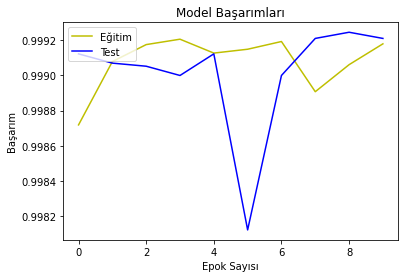

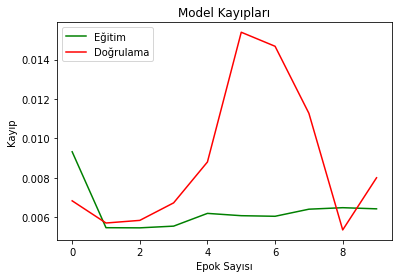

In [47]:
#Eğitim ve doğrulama değerlerinin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"],color="y") 
plt.plot(model.history.history["val_accuracy"],color="b") 
plt.title("Model Başarımları") 
plt.ylabel("Başarım") 
plt.xlabel("Epok Sayısı") 
plt.legend(["Eğitim","Test"], loc="upper left") 
plt.show() 

plt.plot(model.history.history["loss"],color="g")
plt.plot(model.history.history["val_loss"],color="r") 
plt.title("Model Kayıpları") 
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı") 
plt.legend (["Eğitim","Doğrulama"], loc="upper left")
plt.show() 